In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('data.csv',sep='\t')
df1.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


Exploring the data

In [3]:
a = []
for i in df1.columns.unique():
    a.append(i)


In [4]:
'''
Remove the columns not needed.
In this datset,the columns not needed are the columns containing the values such as 
time taken by user to anwer the question and time related value containg columns
'''
df2= df1
df2.drop(df2.columns[50:107],axis=1,inplace=True)
df2.drop(df2.columns[51:],axis=1,inplace=True)
df2.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [5]:
df2.isnull().sum()

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
EXT6       1783
EXT7       1783
EXT8       1783
EXT9       1783
EXT10      1783
EST1       1783
EST2       1783
EST3       1783
EST4       1783
EST5       1783
EST6       1783
EST7       1783
EST8       1783
EST9       1783
EST10      1783
AGR1       1783
AGR2       1783
AGR3       1783
AGR4       1783
AGR5       1783
AGR6       1783
AGR7       1783
AGR8       1783
AGR9       1783
AGR10      1783
CSN1       1783
CSN2       1783
CSN3       1783
CSN4       1783
CSN5       1783
CSN6       1783
CSN7       1783
CSN8       1783
CSN9       1783
CSN10      1783
OPN1       1783
OPN2       1783
OPN3       1783
OPN4       1783
OPN5       1783
OPN6       1783
OPN7       1783
OPN8       1783
OPN9       1783
OPN10      1783
country      77
dtype: int64

In [6]:
df2.dropna(inplace=True)
df2.isnull().count()

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
country    0
dtype: int64

<AxesSubplot:ylabel='country'>

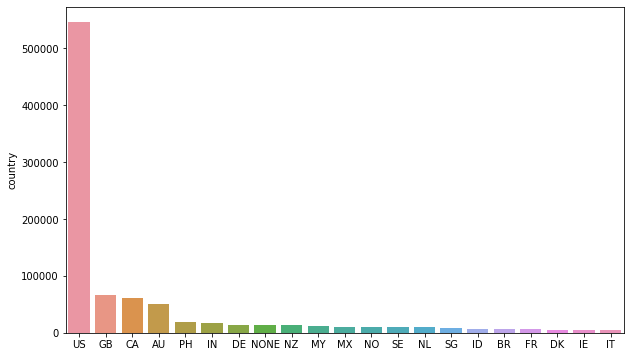

In [7]:
countries = pd.DataFrame(df2['country'].value_counts())

plt.figure(figsize=(10,6))
sns.barplot(data=countries[countries['country']>=5000],x=countries[countries['country']>=5000].index,y='country')

Therefore maximum values for questions answered are from the country US

In [8]:
# visual representation of the questions 

def visualise_it(type,questions,color):
    plt.figure(figsize=(50,70))
    for i in range(1,11):
        plt.subplot(10,5,i)
        sns.histplot(df2[type[i-1]],bins=14,color=color)
        plt.title(questions[type[i-1]],fontsize=18)


In [9]:
ext_questions = {
    'EXT1' :	'I am the life of the party.',
    'EXT2'	: "I don't talk a lot.",
    'EXT3'	: 'I feel comfortable around people.',
    'EXT4'	: 'I keep in the background.',
    'EXT5'	: 'I start conversations.',
    'EXT6'	: 'I have little to say.',
    'EXT7'	: 'I talk to a lot of different people at parties.',
    'EXT8'	: "I don't like to draw attention to myself.",
    'EXT9'	: "I don't mind being the center of attention.",
    'EXT10': '	I am quiet around strangers.'
}
est_questions = {
    'EST1'	 : 'I get stressed out easily.',
    'EST2'	 : 'I am relaxed most of the time.',
    'EST3'	 : 'I worry about things.',
    'EST4'	 : 'I seldom feel blue.',
    'EST5'	 : 'I am easily disturbed.',
    'EST6'	 : 'I get upset easily.',
    'EST7'	 : 'I change my mood a lot.',
    'EST8'	 : 'I have frequent mood swings.',
    'EST9'	 : 'I get irritated easily.',
    'EST10' : 'I often feel blue.'
}

agr_questions = {
    'AGR1'	 : 'I feel little concern for others.',
    'AGR2'	 : 'I am interested in people.',
    'AGR3'	 : 'I insult people.',
    'AGR4'	 : "I sympathize with others' feelings.",
    'AGR5'	 : "I am not interested in other people's problems.",
    'AGR6'	 : 'I have a soft heart.',
    'AGR7'	 : 'I am not really interested in others.',
    'AGR8'	 : 'I take time out for others.',
    'AGR9'	 : "I feel others' emotions.",
    'AGR10' : '	I make people feel at ease.'
}

csn_questions = {
    'CSN1' : 'I am always prepared.',
    'CSN2'  : 'I leave my belongings around.',
    'CSN3'  : 'I pay attention to details.',
    'CSN4'  : 'I make a mess of things.',
    'CSN5'  : 'I get chores done right away.',
    'CSN6'  : 'I often forget to put things back in their proper place.',
    'CSN7'  : 'I like order.',
    'CSN8'  : 'I shirk my duties.',
    'CSN9'  : 'I follow a schedule.',
    'CSN10' : 'I am exacting in my work.'
}

opn_questions = {
    'OPN1'	 : 'I have a rich vocabulary.',
    'OPN2'	 : 'I have difficulty understanding abstract ideas.',
    'OPN3'	 : 'I have a vivid imagination.',
    'OPN4'	 : 'I am not interested in abstract ideas.',
    'OPN5'	 : 'I have excellent ideas.',
    'OPN6'	 : 'I do not have a good imagination.',
    'OPN7'	 : 'I am quick to understand things.',
    'OPN8'	 : 'I use difficult words.',
    'OPN9'	 : 'I spend time reflecting on things.',
    'OPN10' : '	I am full of ideas.'
}

In [10]:
EXT = [col for col in df2 if col.startswith('EXT')]
EST = [col for col in df2 if col.startswith('EST')]
AGR = [col for col in df2 if col.startswith('AGR')]
CSN = [col for col in df2 if col.startswith('CSN')]
OPN = [col for col in df2 if col.startswith('OPN')]

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


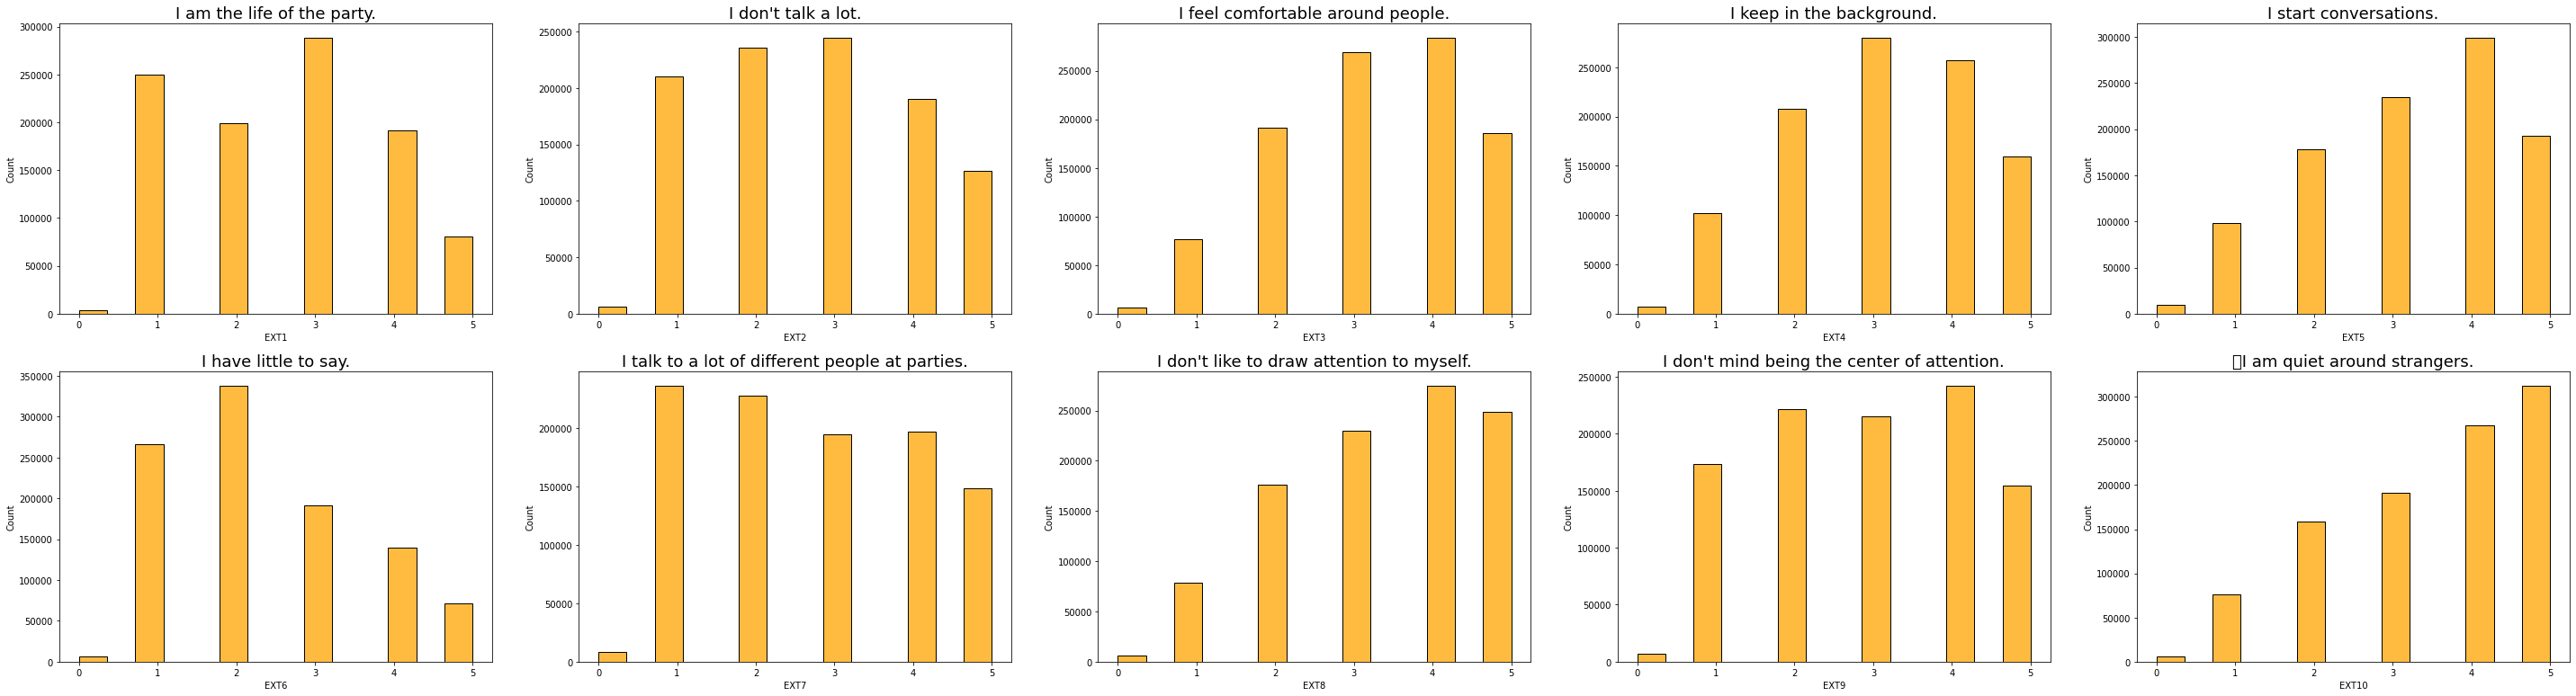

In [11]:
visualise_it(EXT,ext_questions,'orange')  # visulaize extraversion questions

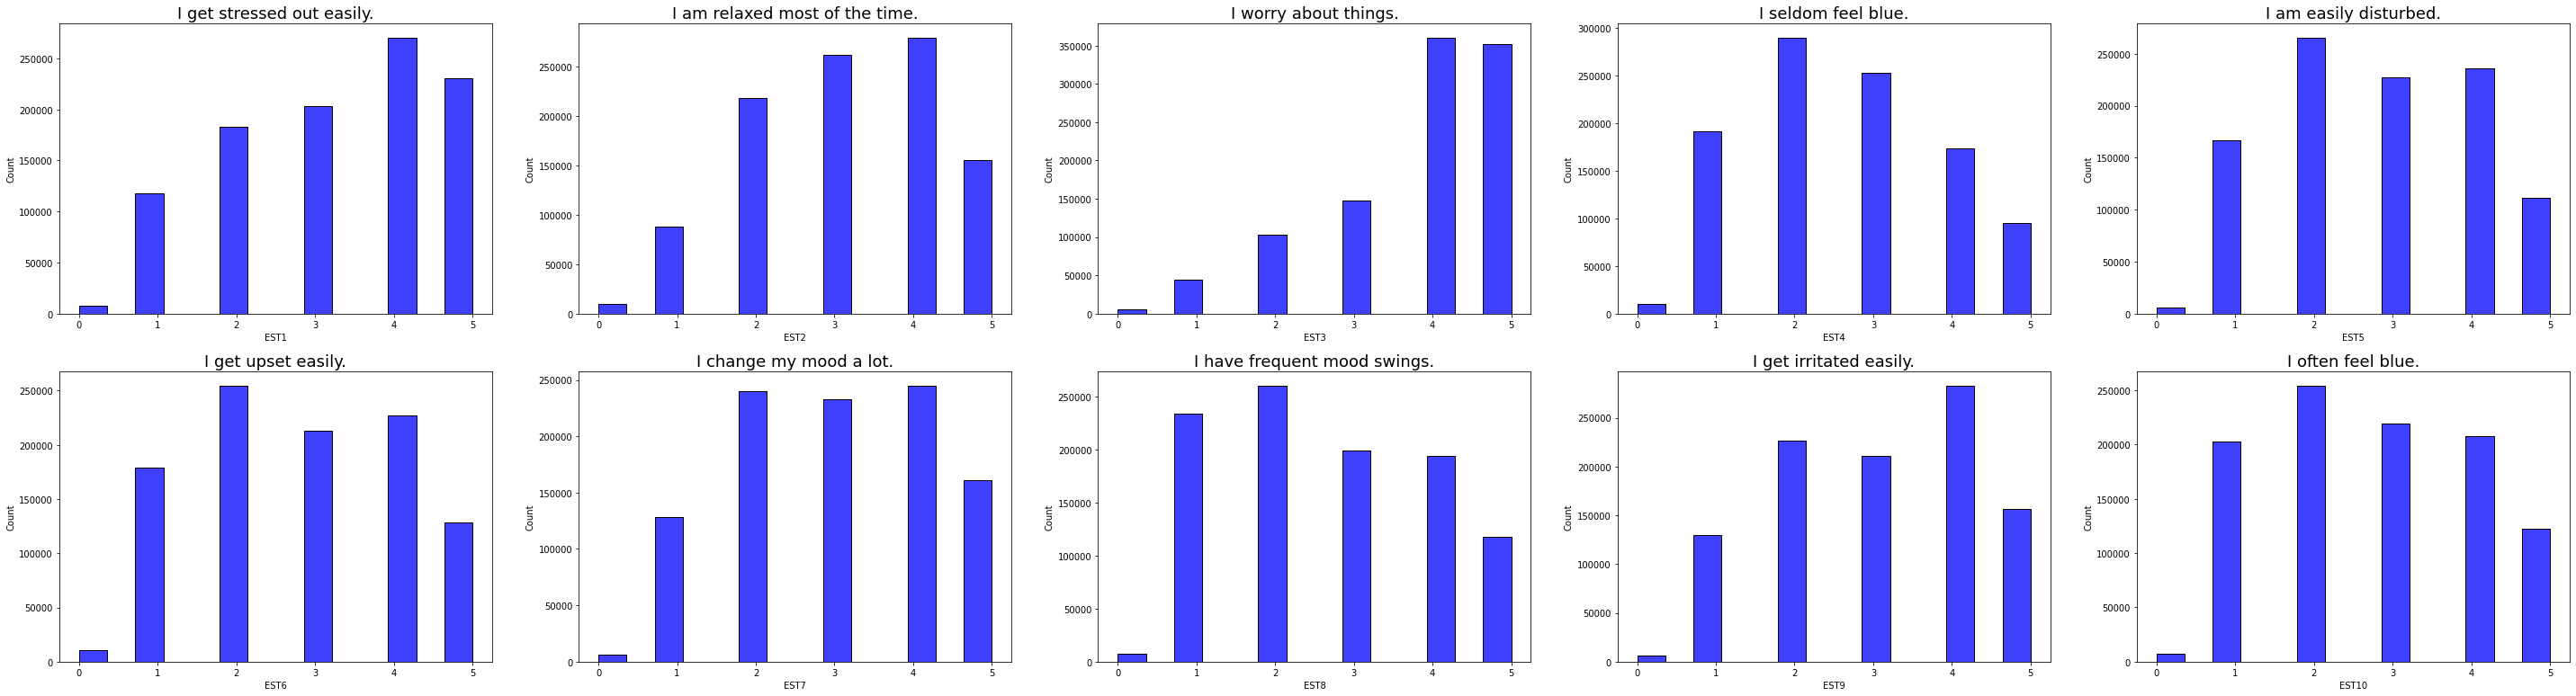

In [12]:
visualise_it(EST,est_questions,'blue')

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


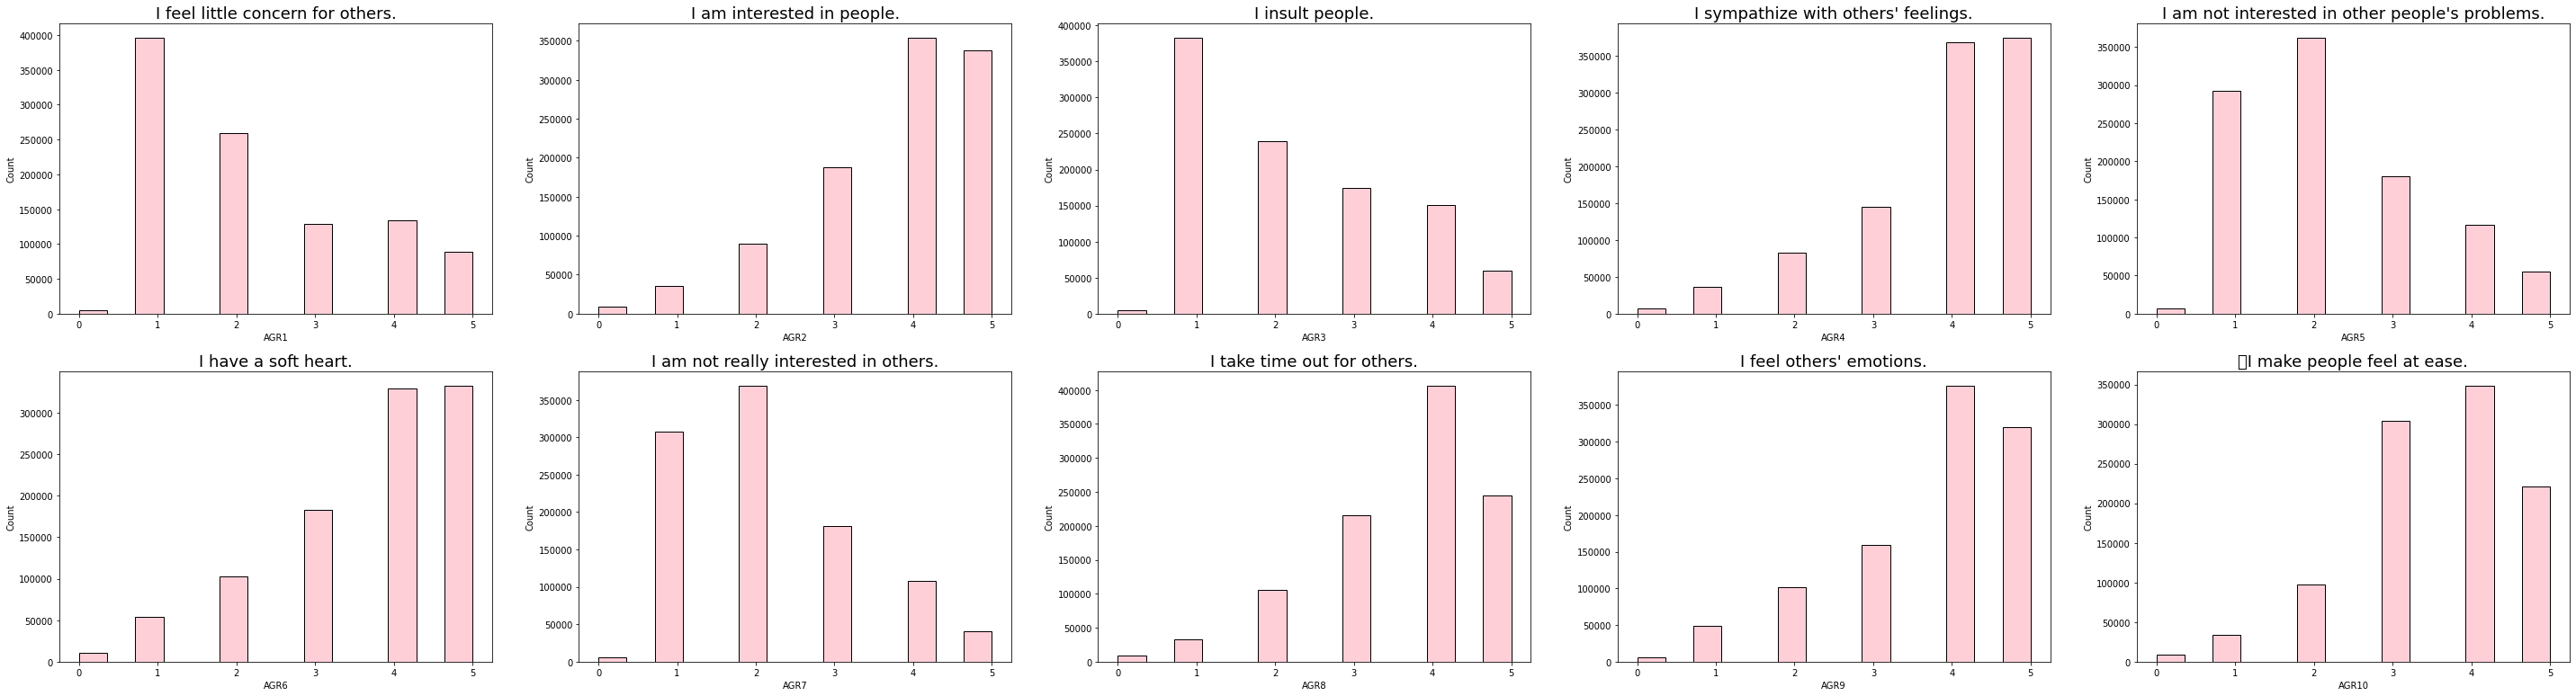

In [13]:
visualise_it(AGR,agr_questions,'pink')

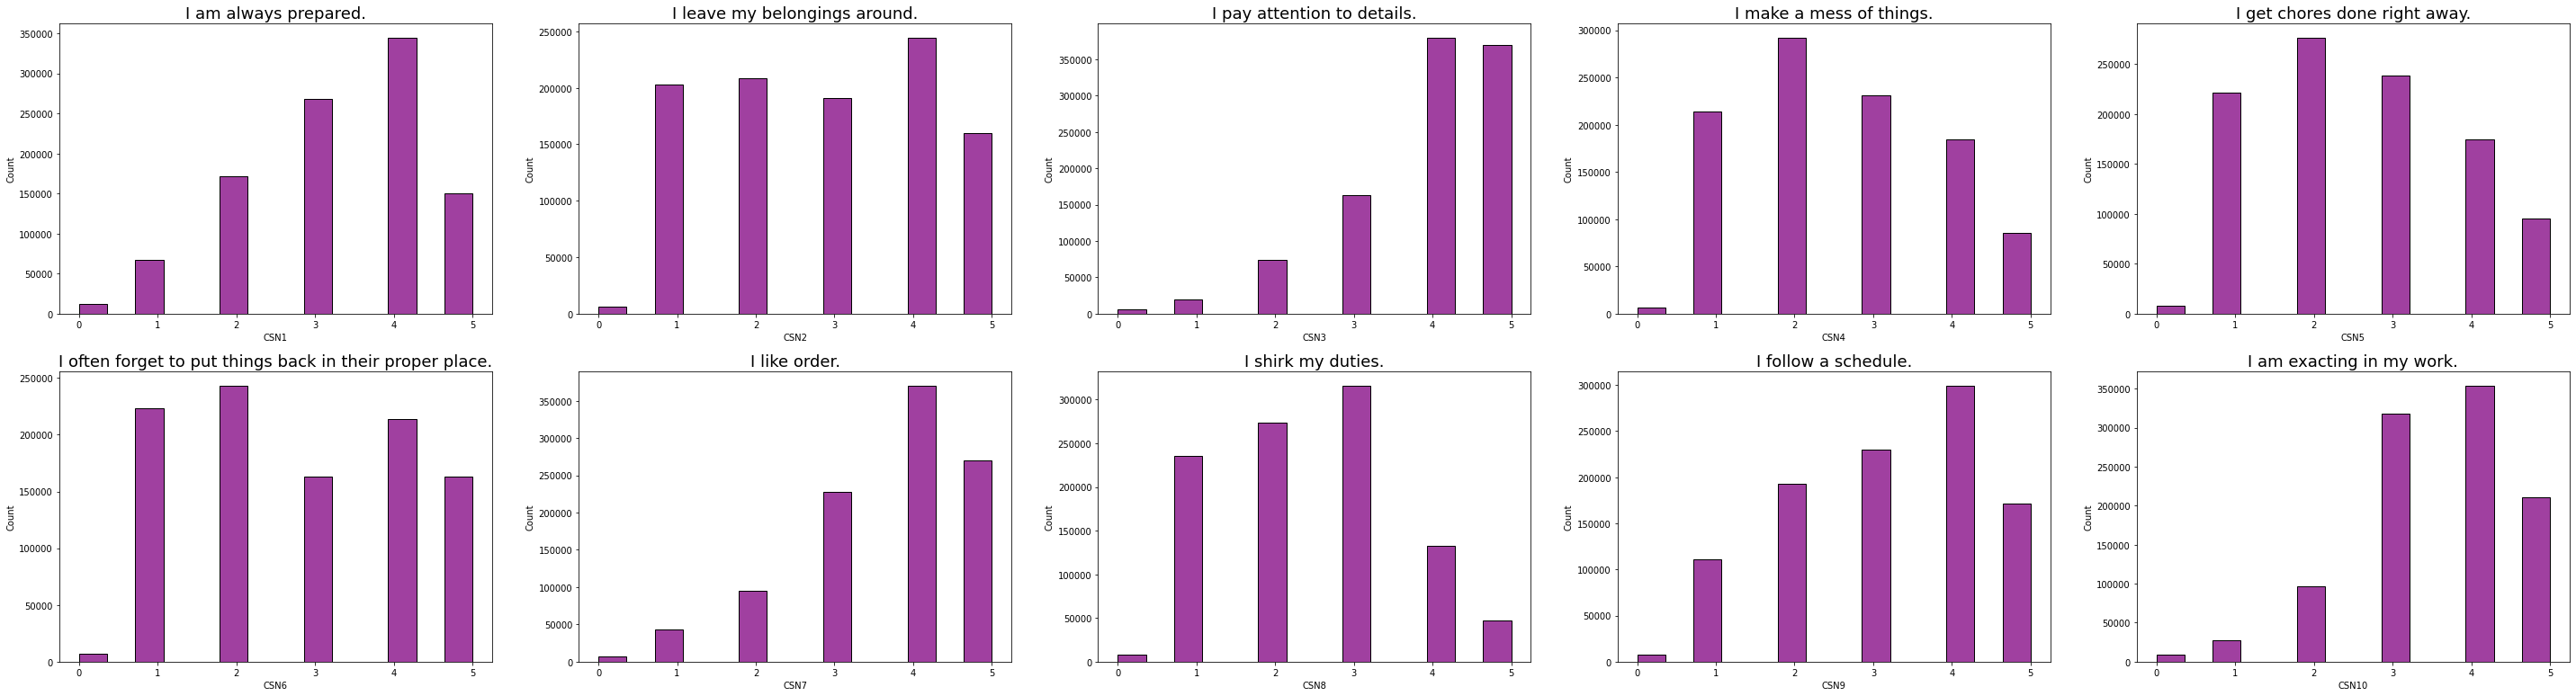

In [14]:
visualise_it(CSN,csn_questions,'purple')

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


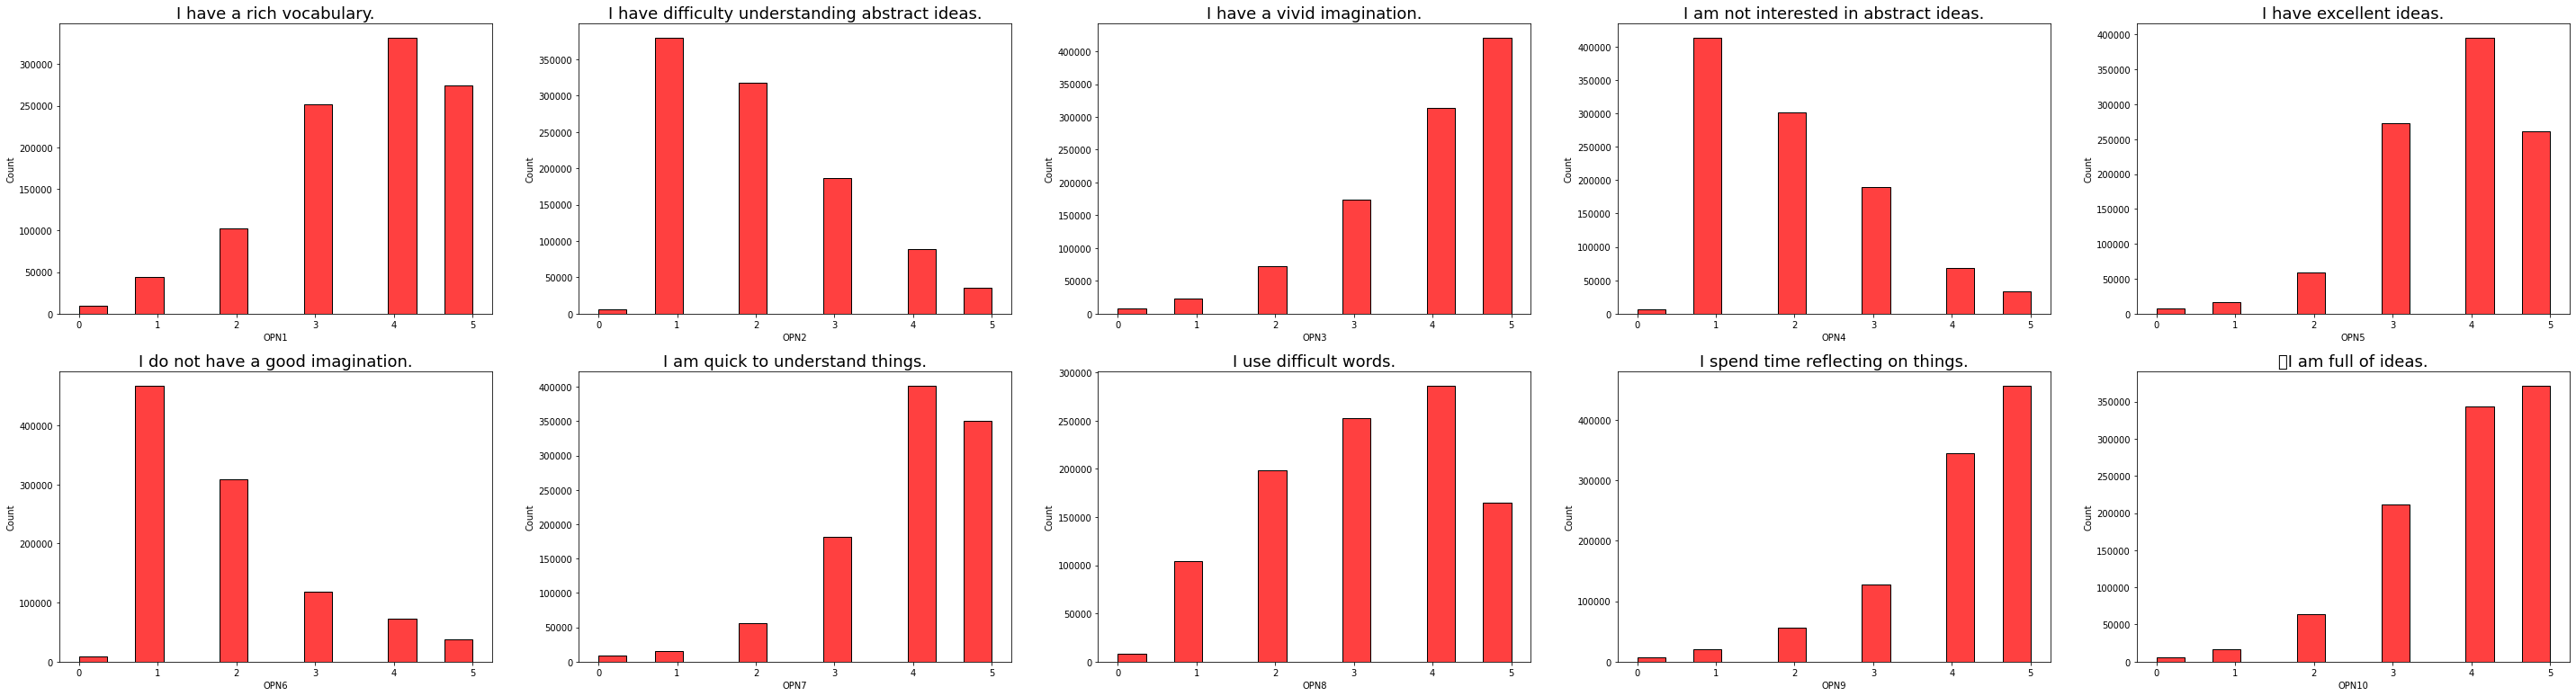

In [15]:
visualise_it(OPN,opn_questions,'red')

In [16]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df3 = df2.drop('country', axis=1)
columns = list(df3.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(df3)
df3 = pd.DataFrame(df3, columns=columns)
df_sample = df3[:5000]

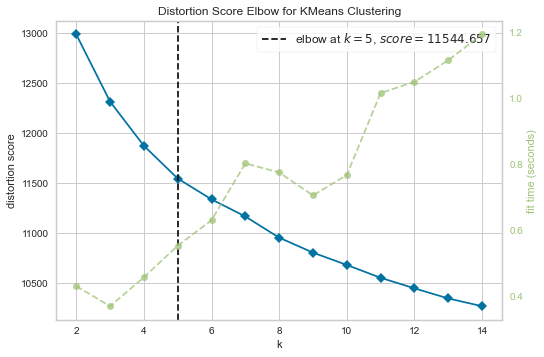

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
'''The elbow method uses the sum of squared distance (SSE) to choose an ideal value of k based 
    on the distance between the data points and their assigned clusters'''
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

this verified that the dataset contains 5 personality traits

In [18]:
from sklearn.cluster import KMeans

# use the unscaled data but without the country column
df_model = df2.drop('country', axis=1)

# define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [19]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,2
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [20]:
df_model.Clusters.value_counts()

4    226016
0    212652
1    209721
3    200301
2    164791
Name: Clusters, dtype: int64

In [21]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.132098,3.295332,3.098875,3.655912,2.967332,2.700177,2.214552,3.996243,2.331984,4.128078,3.509363,3.076289,4.157243,2.605764,2.824808,2.794904,2.875524,2.437141,2.978632,2.711120,1.884426,3.941534,1.692418,4.354636,1.983993,4.147062,2.011596,3.984759,4.177849,3.723600,3.836301,2.229760,4.299687,2.021519,3.240553,2.076120,4.165670,2.017381,3.834119,3.892044,3.575908,2.137784,3.896366,2.062849,3.729953,1.965502,4.010520,2.986231,4.266355,3.817382
1,3.472266,1.943463,4.338812,2.218300,4.264313,1.665932,3.886325,2.808264,3.743960,2.513721,2.319658,3.822598,3.151964,3.284440,2.112817,1.898403,2.108821,1.675216,2.115101,1.717205,1.894689,4.430691,1.831681,4.245231,1.858431,3.845104,1.589068,4.096457,4.098087,4.194210,3.716361,2.579274,4.191731,1.896491,3.139209,2.279719,3.870085,1.934680,3.580552,3.875301,3.885605,1.753334,4.082228,1.794789,4.158658,1.654055,4.314875,3.235632,4.095122,4.295478
2,2.181940,3.294567,2.789363,3.410854,2.579455,2.768246,2.112488,3.532511,2.641249,3.793514,2.344005,3.620732,2.992239,2.919917,2.322190,2.011857,2.299889,1.920518,2.579176,2.245032,3.024310,2.929292,2.570256,2.775182,3.149347,2.650594,3.002755,2.850641,2.603789,2.976704,3.144771,2.828528,3.668010,2.407480,2.370554,2.739288,3.379535,2.511600,2.771838,3.339782,3.534319,1.977754,3.613814,2.058353,3.620544,2.043601,3.884387,3.108459,3.698910,3.665012
3,1.809806,3.627186,2.231986,4.053979,2.284382,3.193484,1.744265,4.067583,2.177483,4.473672,4.249110,2.460128,4.503208,2.145831,3.557741,3.858233,3.988967,3.759422,4.005392,3.931044,2.498350,3.332739,2.604106,3.806232,2.584410,3.823710,2.740920,3.408989,3.647181,3.046810,2.805013,3.356808,3.812462,3.476623,2.092051,3.500946,3.559738,3.044932,2.777300,3.307996,3.500577,2.382370,4.062980,2.137213,3.433488,2.087094,3.677960,3.178347,4.276179,3.722907
4,3.451636,1.914444,3.792015,2.504898,4.040395,1.831870,3.653064,2.766180,3.766180,3.000487,3.805686,2.930983,4.239257,2.414626,3.284334,3.462666,3.804032,3.453548,3.653772,3.171722,2.162851,4.270131,2.660086,4.178492,2.004969,3.993354,1.860554,3.893875,4.126730,3.842684,2.951924,3.611320,3.837525,3.240704,2.230285,3.529600,3.453844,2.831609,2.940256,3.476064,3.738598,2.117124,4.247217,1.966675,3.956861,1.771963,3.961684,3.375288,4.187358,4.201079


In [22]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.052058,2.997079,3.190187,3.161315,3.244885
1,3.085536,2.420622,3.208365,3.106340,3.326978
2,2.910419,2.525555,2.853287,2.916139,3.120515
3,2.966383,3.645907,3.149345,3.173387,3.245911
4,3.072117,3.422063,3.299373,3.210313,3.352385


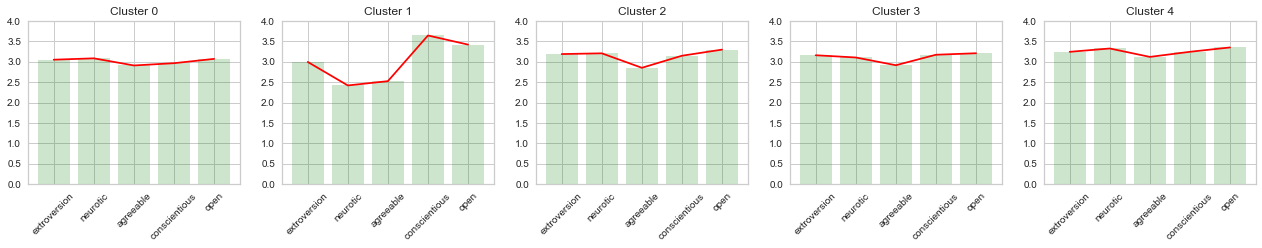

In [23]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

In [24]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.245515,-2.334535,1
1,-0.572398,4.017238,0
2,-1.262787,2.770026,0
3,1.155952,0.118041,2
4,-5.224552,2.600763,1


Text(0.5, 1.0, 'Personality Clusters after PCA')

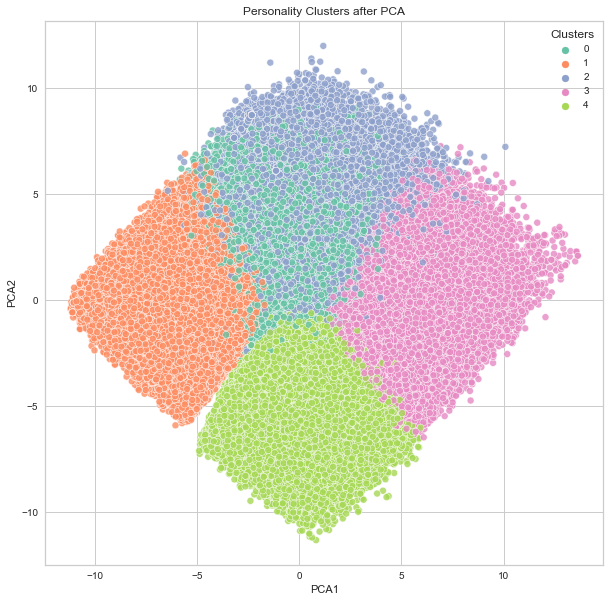

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

In [26]:
import pickle 
with open('persona.pickle','wb') as f:
    pickle.dump(k_fit,f)